# Individual Assignment 3: Graphical Method and Simplex Algorithm

# Name: Daniel Lesh 

# NetID: djl17006

---------------------------------------------------------------------------
**Directions:** Here are some practice problems for you to work on to ensure mastery of the material. 

You may work with your fellow classmates, but you need to complete the assignment on your own. I expect different headers and COMMENTS (comments are the key to showing that you really know your stuff - without comments, your code is useless to me).

**Rubric:**
* Graphical Method (50 pts). To receive full credit, you must include all proper headers from the class examples. Plot the constraints on the graph with shading in proper areas; identify the feasible region with text; find corner points and plot them (intersection of the lines/constraints); and evaluation of the corner points. Answers have been provided to you so you can check your work.

* Simplex Method (50 points). To receive full credit, you must include all proper headers from the class examples for Simplex. Build the initial tableau (and color code the entering, departing variable and make pivot element yellow); use as many pivot operations as necessary; declare the final solution. Almost every line should have an original comment from you... otherwise, no credit. 

## Import Personal Google Drive

In [24]:
from google.colab import drive # Import personal drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Practice Problem 1: Graphical Method
Solve the following LP model using the graphical method.

$Max(Z) = 30X + 40Y$

subject to:
* $4X + 2Y <= 16$
* $Y <= 2$
* $2X - Y >= 2$
* $X,Y >= 0$ (nonnegativity)

This one is a little tricky - if you have trouble shading the graph, try evaluating a sample point on each side of the line and see if it's valid!

The answer is $X=3$, $Y=2$ and $Z = 170$.


# Practice Problem 1 Answer

Import Packages for Graphing and Plotting 

In [25]:
# Import modules for: EDA, numeric functions, and plotting
import pandas as pd # For EDA
import numpy as np # For numeric functions
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For creating interprative graphs (boxplots)

In [26]:
%matplotlib inline
from pylab import * # Package for graphing

import shutil # Package for graphing
import sys # Package for OS on sys
import os.path # Package for path OS on sys

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo")) # Providing command that if shutil package is not called, pyomo is called 

if not (shutil.which("cbc") or os.path.isfile("cbc")): # Providing command that if shutil package is not called, cbc is called 
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *

Create Plot and Declare Solution

Text(3, 2, '(3, 2)')

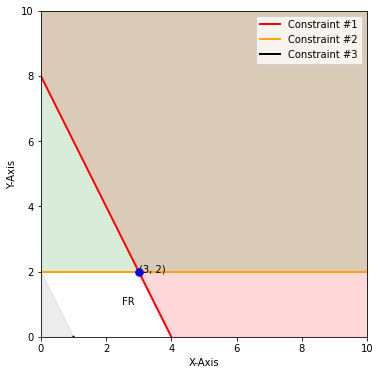

In [51]:
# Set up size for plot 
figure(figsize=(6,6)) # Setting up figure size (6,6) as standard
subplot(111, aspect='equal') # Set up subplot size
axis([0,10,0,10]) # Keeping plot axis' relatively small to make graph clearer when plotting 
xlabel('X-Axis') # No labels given, provided name for it as "X-Axis"
ylabel('Y-Axis') # No labels given, provided name for it as "Y-Axis"

# 4𝑋 + 2𝑌 <= 16 --> Constraint #1 
y = array([8, 0]) # Y values maximum plot = 8
x = array([0, 4]) # X values maximum plot = 4
plot(x,y,'r',lw=2) # Red line is plotted on the graph to show values that meet this constraint 
fill_between([0,4,10], # X area being shaded in 
             [8,0,0], # Y area being shaded in
             [10,10,10], # Upper area
             color='red', # Color 
             alpha=0.15) # Transparency

# 𝑌 <= 2 (horizontal line) --> Constraint #2 
y = array([2, 2]) # Y values maximum plot = 2
x = array([10, 0]) # No value of X will change the outcome of the constraint. All values are included within the range of our graph
plot(x,y,'orange',lw=2) # Horizontal line is plotted on the graph to show values that meet this constraint on the graph
fill_between([0,10,10], # X area being shaded in 
             [2, 2,0], # Y area being shaded in
             [10,10,10], # Upper area
             color='green', # Color 
             alpha=0.15) # Transparency

# 2𝑋 − 𝑌 >= 2 --> Constraint #3
y = array([-2, 0]) # Y values maximum plot = 2
x = array([0, 1]) # X values maximum plot = 1
plot(x,y,'black',lw=2) # Plotting black line on graph to indicate acceptable values on line that meet this constraint
fill_between([0,1], # X area being shaded in 
             [2,0], # Y area being shaded in
             [0,0], # Upper area
             color='grey', # Color 
             alpha=0.15) # Transparency

### Build legend to show which constraint is which
  ## Reminder of Constraints: 
    # Constraint #1 --> 4𝑋 + 2𝑌 <= 16
    # Constraint #2 --> 𝑌 <= 2 (horizontal line)
    # Constraint #3 --> 2𝑋 − 𝑌 >= 2
legend(['Constraint #1','Constraint #2','Constraint #3'])

## Plots 'FR' in the feasible region area 
  # 'FR' = Feasible Region 
  # 'FR' located @ (2.5,1) 
text(2.5,1,'FR')

## Adding sample point to evaluate (3, 2)
  # This is our Max Profit point 
plot(3,2,'b.',ms=15) # Makes a blue dot at point (3,2)
annotate('(3, 2)', xy=(3,2), xytext=(3,2)) # Adds label --> '(3,2)' to the blue dot we just made

# Practice Problem 2: Simplex Method

Solve the following LP model using the simplex method.

$Max(Z) = 5X + 4Y$

subject to:
* $3X + 5Y <= 78$
* $4X + Y <= 36$
* $X,Y >= 0$ (nonnegativity)

The answer is $X=6$, $Y=12$ and $Z = 78$.


# Practice Problem 2 Answer

Insert Color Cell Functions


In [52]:
# Need to insert function to colored a desired cell: 
def styling_specific_cell(x,row_idx,col_idx):
    color = 'background-color: yellow; color: red'
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler

Describe Basic Variables and Nonbasic Variables

The **basic variables** are $s_1$ and $s_2$ and the **nonbasic variables** are $x_1$ and $x_2$.

$x$ = 0

$y$ = 0

$s_1$ = 78

$s_2$ = 36


And is often written as:
$(x, y, s_1, s_2) = (0, 0, 78,36)$

Insert Simplex Tableua

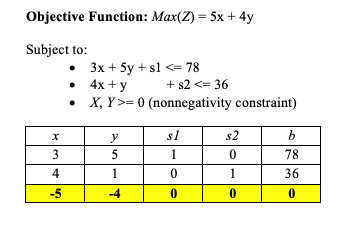

Build Matrix 'A'

In [53]:
# Import packages so Matrix Function is recognized
from sympy import Matrix, Rational, pprint, nsimplify # For building matrixes
import numpy as np # For numeric functions 
import pandas as pd # For EDA 

# Build Matrix designated as 'A' 
A = Matrix([[3,5,1,0,78], # First Constraint 
            [4,1,0,1,36], # Second Constraint 
            [-5,-4,0,0,0]]) # Maximixation Row 
pprint(A) # Print function to print matrix 'A'

⎡3   5   1  0  78⎤
⎢                ⎥
⎢4   1   0  1  36⎥
⎢                ⎥
⎣-5  -4  0  0  0 ⎦


In [54]:
# Adding some 'flavor' to the dataframe to make it look prettier! 
tmp = pd.DataFrame(np.array(A)) # Setting 'tmp' as the dataframe
tmp.columns = ['x', 'y', 's1', 's2', 'b'] # Label the columns for: 'x1', 'x2', 's1', 's2', 'b' 
tmp.index = ['R0', 'R1', 'R2'] # Label ('Index') the 'R_' values in the matrix: 'R0', 'R1', 'R2'
tmp # Displays 'tmp' dataframe built:

,x,y,s1,s2,b
R0,3,5,1,0,78
R1,4,1,0,1,36
R2,-5,-4,0,0,0


Build Pivot #1

Before Building Pivot #1, determine which variable will be entering the matrix that was built:
- The entering variable will be in column 1 (x), since that is where the largest negative value is: -5

From there, we have to determine what departing value will be leaving the matrix: 
- The departing value is the smallest nonnegative ratio from the entering variable's column: 
  - 78/3 = 26 
  - 36/4 = 9 <-- Smallest nonnegative ratio

In [55]:
## Stylzing the matrix that was built:  
  # Continuation function used here to style function to fit specific needs of the linear problem set 
tmp.style\
.apply(lambda x: ['background: lightblue' if x.name == 'x' else '' for i in x]) # Using the lambda function, we apply a light blue background to the 'x1' column, as it has the largest negative (least) value in the matrix

,x,y,s1,s2,b
R0,3,5,1,0,78
R1,4,1,0,1,36
R2,-5,-4,0,0,0


In [56]:
# Redefine 'tmp' dataframe we set originally + plus makes matrix easier to read
tmp = pd.DataFrame(np.array(A).astype(float)) # Gives variable 'tmp' ability to turn into a real number that contains decimals 
tmp.columns = ['x', 'y', 's1', 's2', 'b'] # Label the columns for: 'x1', 'x2', 's1', 's2', 'b' 
tmp.index = ['R0', 'R1', 'R2'] # Label ('Index') the 'R_' values in the matrix: 'R0', 'R1', 'R2'
tmp # Displays 'tmp' dataframe 

## Adding some colors to highlight 'x' column and highlight 'R1' value within 'x' column
  # Style - highlight the Pivot element in matrix
idx_r = 1 # Presents the row of the index to highlight light blue 
idx_c = 0 # Presents the column of the index to highlight light blue 

### Highlight the values in the column 'x' in the pivot element
  ## Also highlights 'R1' in the pivot element
    # Continuation function being used to attribute which values in the pivot are highlighted blue and which are highlighted yellow 
tmp.style\
.apply(lambda x: ['background: lightblue' if x.name == 'x' else '' for i in x])\
.apply(lambda x: ['background: lightblue' if x.name == 'R1' else '' for i in x], axis=1)\
.apply(styling_specific_cell, row_idx = idx_r, col_idx = idx_c, axis = None) 

,x,y,s1,s2,b
R0,3.000000,5.000000,1.000000,0.000000,78.000000
R1,4.000000,1.000000,0.000000,1.000000,36.000000
R2,-5.000000,-4.000000,0.000000,0.000000,0.000000


In [57]:
## Import 'Fraction' package
  # Turns the pivot in highlighted R1 --> (4.000000) into a 1 
from fractions import Fraction as Fraction
A[1,:] = (Fraction(1,4)*A[1,:]) # Multiplies all the values in the second row of the matrix by all of the columns 

# Print updated Matrix 'A'
pprint(A)  

⎡3    5   1   0   78⎤
⎢                   ⎥
⎢1   1/4  0  1/4  9 ⎥
⎢                   ⎥
⎣-5  -4   0   0   0 ⎦


In [58]:
## Change the values above and below the pivot element to 0 defined previously 
  # This edits all the corresponding values in the rows
A[0,:] = A[0,:] - 3*A[1,:] # Redefining 'A[0,:]'

A[2,:] = A[2,:] + 5*A[1,:] # Redefining 'A[2,:]'

## Reprint the new values in Matrix 'A'
  # Matrix 'A' is now complete with new pivot elements included
pprint(A)

⎡0  17/4   1  -3/4  51⎤
⎢                     ⎥
⎢1   1/4   0  1/4   9 ⎥
⎢                     ⎥
⎣0  -11/4  0  5/4   45⎦


Build Pivot #2

Before Building Pivot #2, determine which variable will be entering the matrix that is being built:
- The entering variable will be in column 2 (y), since that is where the largest negative value is: -11/4 

From there, we have to determine what departing value will be leaving the matrix: 
- The departing value is the smallest nonnegative ratio from the entering variable's column: 
  - 51/(17/4) = 12 <-- Smallest nonnegative ratio
  - 9/(1/4) = 36

In [59]:
# Redefine 'tmp' dataframe we set originally + plus makes matrix easier to read
tmp = pd.DataFrame(np.array(A)) # Redefines variable 'tmp' and includes the new values from Pivot #1
tmp.columns = ['x', 'y', 's1', 's2', 'b'] # Label the columns for: 'x1', 'x2', 's1', 's2', 'b' 
tmp.index=['R0', 'R1', 'R2'] # Label ('Index') the 'R_' values in the matrix: 'R0', 'R1', 'R2'
tmp # Displays 'tmp' dataframe built:

## Adding some colors to highlight 'y' column and highlight 'R0' value within 'y' column
  # Style - highlight the Pivot element in matrix
idx_r = 0 # Presents the row of the index to highlight light blue 
idx_c = 1 # Presents the column of the index to highlight light blue  

### Highlight the values in the column 'y' in the pivot element
  ## Also highlights 'R0' in the pivot element
    # Continuation function being used to attribute which values in the pivot are highlighted blue and which are highlighted yellow 
tmp.style\
.apply(lambda x: ['background: lightblue' if x.name == 'y' else '' for i in x])\
.apply(lambda x: ['background: lightblue' if x.name == 'R0' else '' for i in x], axis=1)\
.apply(styling_specific_cell, row_idx = idx_r, col_idx = idx_c, axis = None) 

,x,y,s1,s2,b
R0,0,17/4,1,-3/4,51
R1,1,1/4,0,1/4,9
R2,0,-11/4,0,5/4,45


In [60]:
## Turns the pivot in highlighted R0 --> (17/4) into a 1 
  # This edits all the corresponding values in the rows by multiplying row by 4/17
A[0,:] = Fraction(4,17)*A[0,:] # Redefining 'A[0,:]'

# Print updated Matrix 'A'
pprint(A)

⎡0    1    4/17  -3/17  12⎤
⎢                         ⎥
⎢1   1/4    0     1/4   9 ⎥
⎢                         ⎥
⎣0  -11/4   0     5/4   45⎦


In [61]:
## Change the values above and below the pivot element to 0 defined previously 
  # This edits all the corresponding values in the rows
A[1,:] = A[1,:] - Fraction(1,4)*A[0,:] # Redefining 'A[1,:]'
A[2,:] = A[2,:] + Fraction(11,4)*A[0,:] # Redefining 'A[2,:]'

## Reprint the new values in Matrix 'A'
  # Matrix 'A' is now complete with new pivot elements included
pprint(A)

⎡0  1  4/17   -3/17  12⎤
⎢                      ⎥
⎢1  0  -1/17  5/17   6 ⎥
⎢                      ⎥
⎢       11     13      ⎥
⎢0  0   ──     ──    78⎥
⎣       17     17      ⎦


Read Table and Declare Optimal Solutions 


In [38]:
# Optimal Solution Found (no negative values in 'x' or 'y' columns)!
import pandas as pd # to make optimal solution easier to read 
tmp = pd.DataFrame(np.array(A)) # Reestablish dataframe to make it easier to read optimal solution 
tmp.columns = ['x', 'y', 's1', 's2', 'b'] # Label the columns for: 'x1', 'x2', 's1', 's2', 'b'
tmp # Display dataframe's final solution! 

,x,y,s1,s2,b
0,0,1,4/17,-3/17,12
1,1,0,-1/17,5/17,6
2,0,0,11/17,13/17,78


Optimal values: 
- x = 6
- y = 12 
- s1 = 0 
- s2 = 0 
- z = 78 

Display Answers in Compact Form: 
(x1, x2, s1, s2) = (6, 12, 0, 0) 

or

$(Z) = 5X + 4Y$ = 6 * (5) + 12 * (4) = 78 

